In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [ ]:
data = load_iris()
X = data.data
y = data.target

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
input_size = X_train.shape[1]
hidden_size = 5
output_size = y_train.shape[1]

In [ ]:
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.random.randn(hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b2 = np.random.randn(output_size)

In [ ]:
learning_rate = 0.01
epochs = 1000
mse_list = []
accuracy_list = []

In [ ]:
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(X_train, W1) + b1
    a1 = 1 / (1 + np.exp(-z1))
    z2 = np.dot(a1, W2) + b2
    a2 = 1 / (1 + np.exp(-z2))

    # Compute the error
    error = y_train - a2
    mse = np.mean(np.square(error))
    mse_list.append(mse)

    # Backpropagation
    d2 = error * a2 * (1 - a2)
    dW2 = np.dot(a1.T, d2)
    db2 = np.sum(d2, axis=0)
    d1 = np.dot(d2, W2.T) * a1 * (1 - a1)
    dW1 = np.dot(X_train.T, d1)
    db1 = np.sum(d1, axis=0)

    # Updating weights and biases
    W2 += learning_rate * dW2
    b2 += learning_rate * db2
    W1 += learning_rate * dW1
    b1 += learning_rate * db1

    predictions = np.argmax(a2, axis=1)
    true_labels = np.argmax(y_train, axis=1)
    accuracy = accuracy_score(true_labels, predictions)
    accuracy_list.append(accuracy)

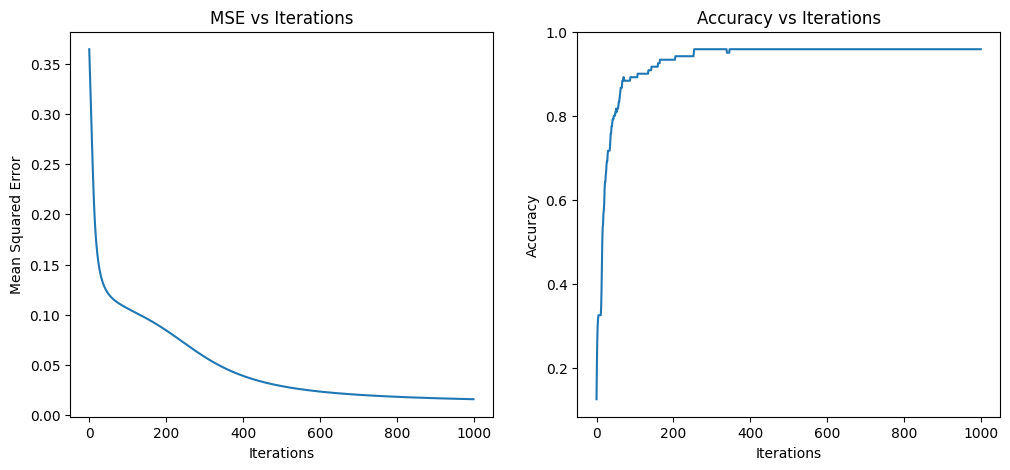

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), mse_list, label='MSE')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Iterations')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), accuracy_list, label='Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Iterations')

plt.show()

In [ ]:
# Forward pass on the test set
z1_test = np.dot(X_test, W1) + b1
a1_test = 1 / (1 + np.exp(-z1_test))
z2_test = np.dot(a1_test, W2) + b2
a2_test = 1 / (1 + np.exp(-z2_test))

# Predictions on the test set
p_test = np.argmax(a2_test, axis=1)
true_labels = np.argmax(y_test, axis=1)

test_accuracy = accuracy_score(true_labels, p_test)

**Conclusion :** In this experiment, we successfully implemented backpropagation to train a neural network on a dataset. The process involved adjusting the weights and biases to minimize the error between predicted and actual outputs. By evaluating the model on a test set, we observed its accuracy, demonstrating how backpropagation enables the network to learn and generalize from data. This experiment highlights the effectiveness of backpropagation in training neural networks for accurate predictions.